<a href="https://colab.research.google.com/github/GilbertoIFG/myprojects/blob/main/GeoJson_Polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coordenadas do Sensor 1: (50.92046734605006, 76.18612381329194, 44.13029185241891)
Coordenadas do Sensor 2: (-82.57461732326516, -77.83067692009784, -10.865383663546012)
O Sensor 1 não está no alcance do Sensor 2.
O Sensor 2 não está no alcance do Sensor 1.


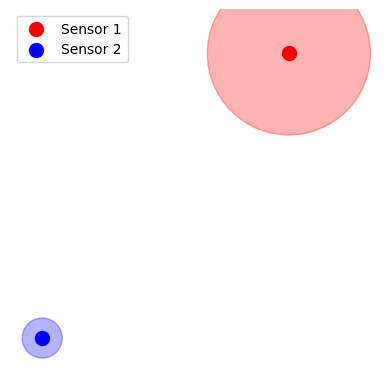

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Função para verificar se um ponto está dentro do alcance de um sensor
def ponto_dentro_do_alcance(sensor, ponto):
    distancia = np.sqrt((ponto[0] - sensor[0])**2 + (ponto[1] - sensor[1])**2)
    return distancia <= sensor[2]

# Função para verificar se os sensores estão dentro do alcance um do outro
def sensores_dentro_do_alcance(sensor1, sensor2):
    distancia_centros = np.sqrt((sensor1[0] - sensor2[0])**2 + (sensor1[1] - sensor2[1])**2)
    soma_radios = sensor1[2] + sensor2[2]
    return distancia_centros < soma_radios

# Gerar coordenadas aleatórias para os sensores e a sala
def gerar_coordenadas_aleatorias():
    sala = np.random.uniform(low=-90, high=90, size=(2,))  # Coordenadas da sala (latitude, longitude)
    sensor1 = np.random.uniform(low=-90, high=90, size=(3,))  # Coordenadas do sensor 1 (latitude, longitude, alcance)
    sensor2 = np.random.uniform(low=-90, high=90, size=(3,))  # Coordenadas do sensor 2 (latitude, longitude, alcance)
    return sala, sensor1, sensor2

# Fazer o plot dos sensores e da sala
def plotar_sensores_e_sala(sala, sensor1, sensor2):
    # Gerar pontos para o plot
    x_sensores = [sensor1[0], sensor2[0]]
    y_sensores = [sensor1[1], sensor2[1]]
    r_sensores = [sensor1[2], sensor2[2]]
    cores = ['r', 'b']
    alphas = [0.3, 0.3]

    # Fazer o plot dos sensores como círculos
    for i in range(2):
        plt.scatter(x_sensores[i], y_sensores[i], s=100, c=cores[i], label=f'Sensor {i+1}', zorder=2)
        plt.gca().add_patch(plt.Circle((x_sensores[i], y_sensores[i]), radius=r_sensores[i], color=cores[i], alpha=alphas[i], zorder=1))

    # Definir os limites do plot
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)

    # Adicionar legendas
    plt.legend()

    # Remover eixos e grid
    plt.axis('off')

    # Exibir o plot
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Gerar coordenadas aleatórias e fazer o plot
sala, sensor1, sensor2 = gerar_coordenadas_aleatorias()

# Mostrar informações antes do plot da imagem
print(f"Coordenadas do Sensor 1: {tuple(sensor1)}")
print(f"Coordenadas do Sensor 2: {tuple(sensor2)}")

# Verificar se o Sensor 1 está no alcance do Sensor 2
if ponto_dentro_do_alcance(sensor1, sensor2):
    print("O Sensor 1 está no alcance do Sensor 2.")
else:
    print("O Sensor 1 não está no alcance do Sensor 2.")

# Verificar se o Sensor 2 está no alcance do Sensor 1
if ponto_dentro_do_alcance(sensor2, sensor1):
    print("O Sensor 2 está no alcance do Sensor 1.")
else:
    print("O Sensor 2 não está no alcance do Sensor 1.")

# Fazer o plot dos sensores e da sala
plotar_sensores_e_sala(sala, sensor1, sensor2)
